In [15]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below** (in case the file names get mixed up)

In [16]:
#Audrey Bovet

**Generic note**: in this whole lab and from now, unless explicitly asked, you are not required to implement yourself the algorithms that you use. You may instead use existing implementations from e.g. scikit-learn.

In general, when you use implementations of algorithms that are not your own (which will be the case 99% of the time in real life), it is a good idea to check the documentation of the libraries you use to make sure you are not missing something important. As such, you are strongly encouraged to do so in this lab.

**Note bis**: in this lab, some questions may be (deliberately) ambiguous, or there may be multiple acceptable solutions (but also some unacceptable ones). So do not panic if you do not have exactly the same result as your neighbor, or as the future solution.

The goal is to make you learn by forcing you to think about what is happening and what should be done in different situations. However, so goal is **not** to punish you by giving you a bad grade because of some trick questions. So once again, **do not hesitate to ask questions**, and do not hesitate to ask an instructor whether your solution seems correct during lab sessions.

# Dataset

Let's load data for classification. This data is generated and does not a precise meaning: the idea will be to build intuition about what is going on with different models.

Dataset can be downloaded here: https://drive.google.com/file/d/1Sy0Ly4Xj8fzPAiPru9oFS6evgQjuNMs4/view?usp=sharing

In [17]:
# Load the dataset;
# make sure that the file is located in the same folder as the notebook
# (or change the path)
dataset = np.load("dataset.npy")

In [18]:
# Extract features and targets
X = dataset[:,:2] # features are first 2 columns
y = dataset[:,-1] # labels are last column
print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (300, 2)


# Data preparation

We are going to do classification with different models, that will require selecting some hyper-parameter(s).

**In general, how should the dataset be split in this case?**

In [6]:
#We have seen that when we want to select some hyper-parameters we should split the data set in 3.
#Usually train, test and validation. The validation set will allow us to determine the hyperparamater
#The test one will allow us to test the performanceof our model.

**For now, split the dataset into one training, one validation and one testing sets.** You can use the sklearn.model_selection.train_test_split function (but you don't have to).

We shall use the name X_train, X_val and X_test (respectively y_train, y_val and y_test) to refer to the samples (respectively labels) of these sets.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_1, y_train, y_1 = train_test_split(X, y, test_size=0.33, random_state=42)#found on the documentation Sklearn

X_val, X_test, y_val, y_test = train_test_split(
    X_1, y_1, test_size=0.5, random_state=42)#we split the old test dataset into a test one and a validation one

It is generally a good idea to have a look at the data whenever possible.

**Display the training dataset using a scatterplot**

*We should display colors for classes (or any other way to differentiate them such as shapes), otherwise we are not learning much.*

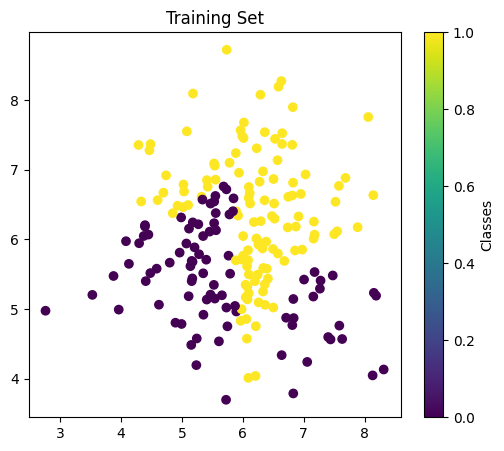

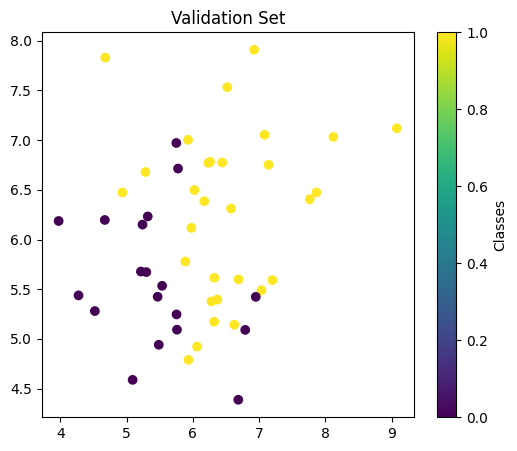

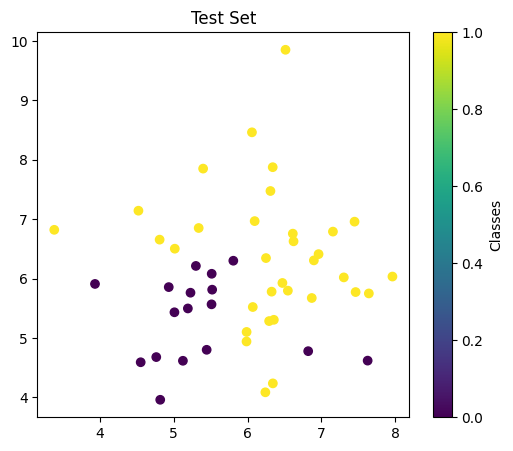

In [20]:
import matplotlib.pyplot as plt

# Train
plt.figure(figsize=(6,5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("Training Set")
plt.colorbar(label="Classes")
plt.show()

# Test
plt.figure(figsize=(6,5))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val)
plt.title("Validation Set")
plt.colorbar(label="Classes")
plt.show()

# Validation
plt.figure(figsize=(6,5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title("Test Set")
plt.colorbar(label="Classes")
plt.show()

# (Linear) model training

## Basic model training

**Train a first <ins>linear</ins>, <ins>classification</ins> model.** Do **not** use regularization for now.

You don't have to reimplement everything, you can use existing implementations (for example the one from scikit-learn). Don't evaluate the performance of the model for now, just train it.

In [21]:
from sklearn.linear_model import LogisticRegression#we use this one as it is a classification model
#Linear = decision bondary is a line

model = LogisticRegression(penalty=None).fit(X_train, y_train)

**Are you *certain* your model does not have regularization?**

In [0]:
#yes, penalty none

**What is the score of the model?**

(by "score", we mean "accuracy" here, i.e. the fraction of correct predictions).

In [22]:
model.score(X_train, y_train)

0.7611940298507462

**What if, instead of directly doing binary classification, we wanted to have some estimation of how confident the model is?**

Or, how could we obtain probabilities between 0 and 1 instead of binary predictions? (**Hint**: look at the doc of the model you used).

**Don't answer the question with words, directly provide the corresponding probability estimates.**

In [23]:
probs= model.predict_proba(X_train)
print(probs)

[[0.09166081 0.90833919]
 [0.78034522 0.21965478]
 [0.665175   0.334825  ]
 [0.92615607 0.07384393]
 [0.30369938 0.69630062]
 [0.83018387 0.16981613]
 [0.10550663 0.89449337]
 [0.13977676 0.86022324]
 [0.92525432 0.07474568]
 [0.23916728 0.76083272]
 [0.78670098 0.21329902]
 [0.85454813 0.14545187]
 [0.96147813 0.03852187]
 [0.2523098  0.7476902 ]
 [0.68179265 0.31820735]
 [0.04402761 0.95597239]
 [0.61507364 0.38492636]
 [0.19190303 0.80809697]
 [0.23400331 0.76599669]
 [0.27643486 0.72356514]
 [0.2270506  0.7729494 ]
 [0.79548552 0.20451448]
 [0.37472905 0.62527095]
 [0.65070093 0.34929907]
 [0.21351662 0.78648338]
 [0.49875155 0.50124845]
 [0.81139828 0.18860172]
 [0.45814322 0.54185678]
 [0.29152711 0.70847289]
 [0.37107333 0.62892667]
 [0.95827871 0.04172129]
 [0.40251943 0.59748057]
 [0.12366417 0.87633583]
 [0.68430736 0.31569264]
 [0.02230958 0.97769042]
 [0.44390455 0.55609545]
 [0.02804087 0.97195913]
 [0.09739141 0.90260859]
 [0.23761742 0.76238258]
 [0.47982024 0.52017976]


**Assuming we only had these probabilities, could we still make binary predictions?**

## Visualization of predictions

Now, let's visualize our probability estimates. Scikit-learn provides a useful tool for this: DecisionBoundaryDisplay.

The exact way it works is not that important, but the general is: we use our model to predict a probability for every pixel in the area of interest, based on its coordinates (which are its 2D features), and we display a color  corresponding to the estimated probability.

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

I will retrain a logistic regression for the purpose of illustrating this. This may not be the exact solution to the previous questions.

In [25]:
# Train a logistic regression
logreg = LogisticRegression() # (hyper)-parameters may differ from previous question
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


And now we display the probabilities:

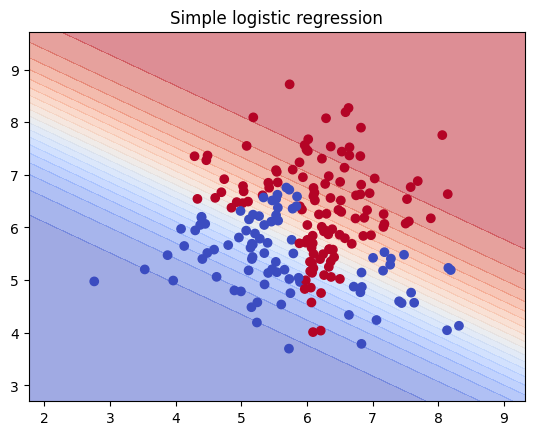

In [26]:
# Use DecisionBoundaryDisplay to display a heatmap corresponding to the estimated probabilities
disp = DecisionBoundaryDisplay.from_estimator(
    logreg, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
# Add the training points on top using a scatterplot
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Simple logistic regression")
plt.show()

**Does this look like a good fit?**

**Could we adapt our logistic regression model to have non-linear decision boundaries? How?**

## Non-linear logistic regression

**Train a logistic regression model using polynomial features. Are there any hyper-parameter? If yes, use a <ins>rigorous</ins> selection process to select an appropriate value.**

You can ignore regularization for now.

In [27]:
import sklearn
print(sklearn.__version__)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

degrees = range(1,6)
val_scores = []

for d in range(1, 6) :
    
    #We create the polynomial features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    #We train the model
    model = LogisticRegression(penalty=None, max_iter=100000) #without regularization
    model.fit(X_train_poly, y_train)
    
    #We use the validation set
    y_val_pred = model.predict(X_val_poly)
    score = accuracy_score(y_val, y_val_pred)
    val_scores.append(score)

print(val_scores)
best_degree = degrees[np.argmax(val_scores)]
print("Best degree :", best_degree)

#Now we train the model with the best degree

poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
    
#We train the model
model = LogisticRegression(penalty=None, max_iter=100000) #without regularization
model.fit(X_train_poly, y_train)

# We use the test set
X_test_poly = poly.transform(X_test)
test_score = model.score(X_test_poly, y_test)
print("Score on test :", test_score)

1.7.2


/opt/python/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 12993 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.7755102040816326, 0.8163265306122449, 0.8775510204081632, 0.8979591836734694, 0.9387755102040817]
Best degree : 5
Score on test : 0.88


/opt/python/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 12993 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**If you were to proudly announce the performance of your model to the public, what is the value that you would you disclose?**

Now, we may want to also visualize the decision boundaries of our model with polynomial features.

Unfortunately, giving a matrix X_train_poly (for instance) of shape (100, 10) (for instance) to DecisionBoundaryDisplay.from_estimator will result in an error, as DecisionBoundaryDisplay only knows how to handle pixels in 2D, not in 10D.

Fortunately, we can combine a series of transformation on X_train as a single estimator using scikit-learn's Pipeline. We can also introduce other preprocessing (or even postprocessing) steps in the process, such as feature standardization.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [29]:
# Create a pipeline that first standardizes the data,
# then transforms it with PolynomialFeatures
# and finally fits LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()), # standardize features
    ('poly', PolynomialFeatures(degree=2)), # for instance
    ('logreg', LogisticRegression(max_iter=500)) # for instance
])

Now we can directly call "fit" on this pipeline to train the model, and give this pipeline to DecisionBoundaryDisplay so that for each pixel, it can:
- compute the corresponding polynomial features from the initial 2D coordinates
- give these features to our logistic regression

and then display the heatmap of estimated probabilities as previously.

In [30]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


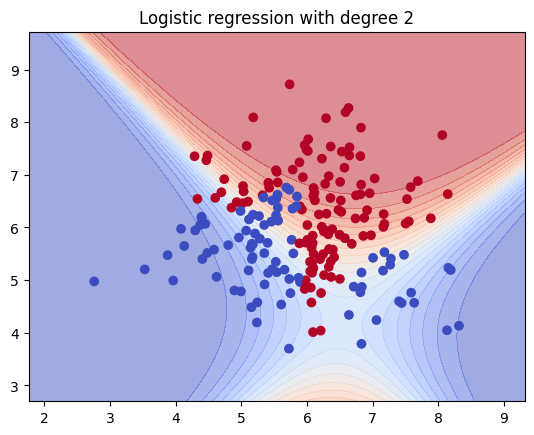

In [31]:
# Give the pipeline to DecisionBoundaryDisplay to plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Logistic regression with degree 2")
plt.show()

**Do the features <ins>used</ins> by the model have zero mean and unit standard deviation with our current pipeline? If not, what should be changed so that this is the case?**

/opt/python/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


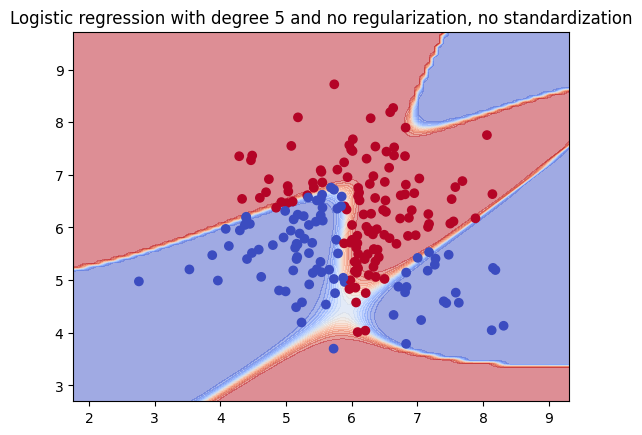

In [32]:
pipeline = Pipeline([
    #('scaler', StandardScaler()), # standardize features
    ('poly', PolynomialFeatures(degree=5)), # I change with the degree I have found
    ('logreg', LogisticRegression(penalty=None, max_iter=1000)) # I didn't use any regularization
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Give the pipeline to DecisionBoundaryDisplay to plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Logistic regression with degree 5 and no regularization, no standardization")
plt.show()

**Now plot the probability heatmap of *your* model from earlier**

**Any observation?**

## Regularization and k-fold cross-validation

Our estimation of the best hyper-parameter may not be super robust, because we do not have many validation samples. So the size of our validation set is limited.

To overcome this, we will use **k-fold cross-validation.**

You do not need to implement it yourself. We will use scikit-learn's GridSearchCV from sklearn.model_selection instead, that enables to do k-fold to try different values of hyper-parameters.
 
As usual, do not hesitate to have a look at scikit-learn's documentation on this.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
# Defining a pipeline
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=500, solver='liblinear'))
])

Assuming we want to do test different possible values for the *"include_bias"* (hyper)parameter of PolynomialFeatures, and different values for *"penalty"* in LogisticRegression, we can specify the values to try as such:

In [36]:
# Defining the set of hyperparameters
hyperparameters = {
    'poly__include_bias': [True, False],
    'logreg__fit_intercept': [True, False]
}

And then, we can run k-fold to find the best combination of hyper-parameters like so:

In [37]:
# Running grid search
gridsearch = GridSearchCV(clf_pipeline, hyperparameters)
gridsearch.fit(X_train, y_train)

,estimator,Pipeline(step...liblinear'))])
,param_grid,"{'logreg__fit_intercept': [True, False], 'poly__include_bias': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


The average score of the k-fold cross-validation for each set of hyper-parameter can be accessed as such:

In [38]:
gridsearch.cv_results_["mean_test_score"]

array([0.79121951, 0.78621951, 0.78621951, 0.75134146])

We could look at the hyper-parameters used for each run of k-fold to determine to best set of hyper-parameters. Scikit-learn also conviently provides a function/attribute that directly returns the best estimator:

In [39]:
gridsearch.best_estimator_

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


**How many <ins>total</ins> model trainings took place here?**

In [25]:
#We train the model for each scenarios, we have 4 scenarios
#and cv train the model 5 times
#So we do 20 trains here.


Since we are now doing k-fold cross-validation, we can merge our training set and our validation set into a single dataset, which be split again during k-fold.

**Merge the training and validation set**

You may call the resulting matrices and vectors X_fold and y_fold

In [40]:
X_fold = np.concatenate((X_train, X_val))
y_fold = np.concatenate((y_train, y_val))

**Find the best combination of polynomial degree and regularization using k-fold cross-validation, with $k=10$**

In [41]:
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=500, solver='liblinear'))
])

hyperparameters = {
    'poly__degree': [1,2,3,4,5,6,7,8,9,10],
    'logreg__C': [20,18,19,21,22] 
}

gridsearch = GridSearchCV(clf_pipeline, hyperparameters, cv=10)
gridsearch.fit(X_fold, y_fold)

#We obtain degree 7 and C=10 so lambda = 1/10
#But with putting other C in the initialization of test we obtain degree 5 and C=20 so lambda = 1/20
#then it is C=110 and degree= 4

#Seems in the end it is Degree = 5 and C=20 so lambda = 1/20

print("Best parameters:", gridsearch.best_params_)
best_model = gridsearch.best_estimator_


/opt/python/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'logreg__C': 20, 'poly__degree': 5}


**Plot the corresponding probability heatmap**

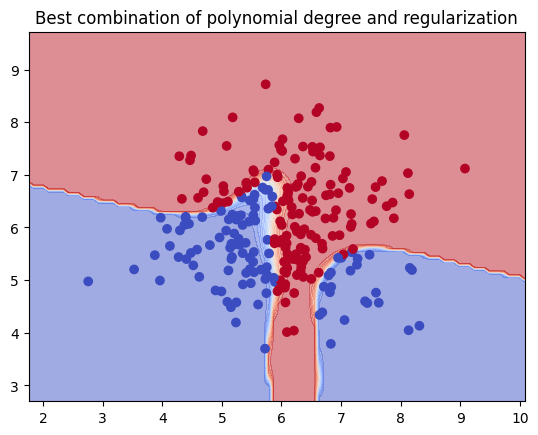

In [42]:
# Give the pipeline to DecisionBoundaryDisplay to plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    best_model, X_fold,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_fold[:, 0], X_fold[:, 1], c=y_fold, cmap=plt.cm.coolwarm)
plt.title("Best combination of polynomial degree and regularization")
plt.show()

**What is the final accuracy of your model?**

In [43]:
best_model.score(X_fold, y_fold)

0.992

Now we are starting to have good methodology!

Even though accuracy may not always be best way to measure performance, but we will cover that in later classes.

# Exploration of other algorithms

Now, we will use the heatmap displays to build some intuition about what happens with other classification algorithms.

## K-Nearest Neighbors

**Can we obtain probabilities with K-NN?**

For this question, "probability" may be interpreted as "a measure of confidence more precise than a yes/no answer".

**Fit K-NN on the training dataset with K ranging for 1 to 6, and plot the confidence heatmap.**

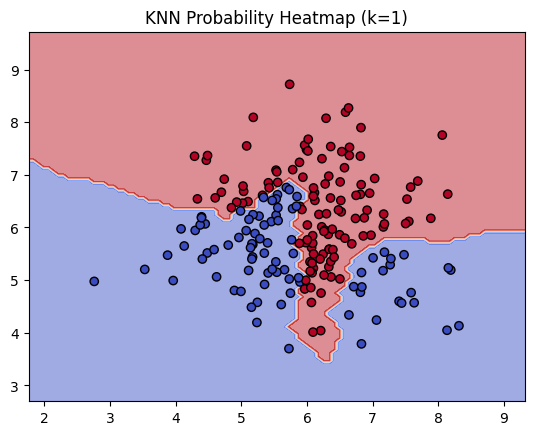

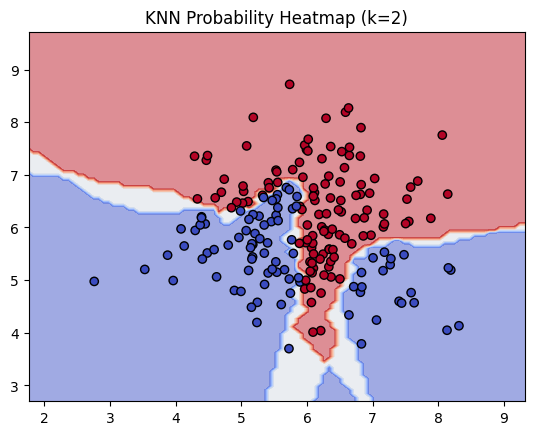

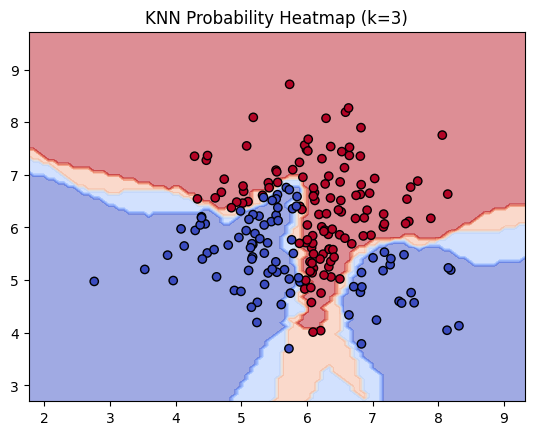

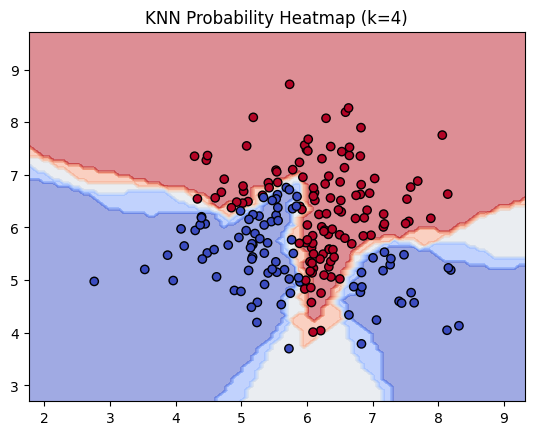

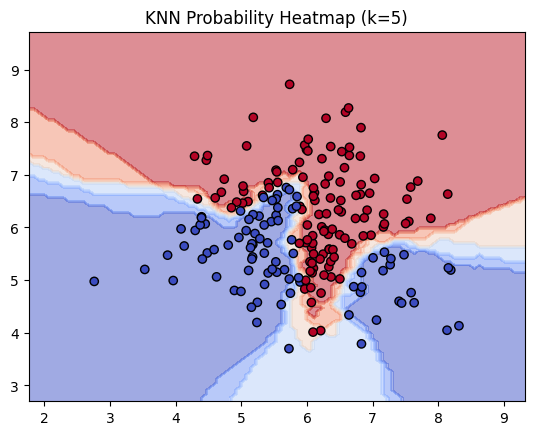

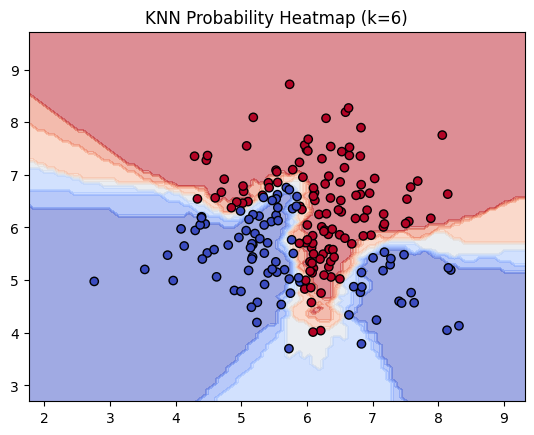

In [44]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    disp = DecisionBoundaryDisplay.from_estimator(
    knn, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)

    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(f"KNN Probability Heatmap (k={k})")
    plt.show()






**Briefly explain what's happening**

## Naive Bayes

**Choose a suitable Naive Bayes classifier, and do same thing**

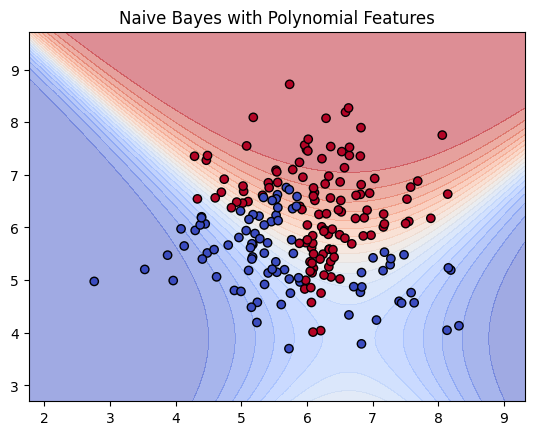

In [45]:
#We will use the gaussian classifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# We will use a gaussian naive bayes
pipeline = Pipeline([
    #('poly', PolynomialFeatures(degree=1)),
    ('nb', GaussianNB())
])

# Fit the pipeline to training data
pipeline.fit(X_train, y_train)

# Plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)

# Overlay training data
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                 cmap=plt.cm.coolwarm, edgecolors="k")

plt.title("Naive Bayes with Polynomial Features")
plt.show()


**Are there any hyper-parameter?**

***Bonus question: explain what is going on your plot.***

## Decision tree

**Can we obtain probabilities with decision trees?**

In [44]:
#yes we can obtain probabilities with decision trees
#There is a predict proba in the documentation saying tha this functio,
#predicts class probabilities of the input samples X.
#The predicted class probability is the fraction of samples of the same class in a leaf.

**Are there hyper-parameters with decision trees?**

In [0]:
#Yes there ara different hyper-parameters with decision tree
#criterion (gini or shanon enthropy for instance)
#max depth and others...

**Similarly to K-NN earlier, fit decision trees with a max depth ranging for 1 to 10 on the training dataset, and plot the confidence heatmap.**

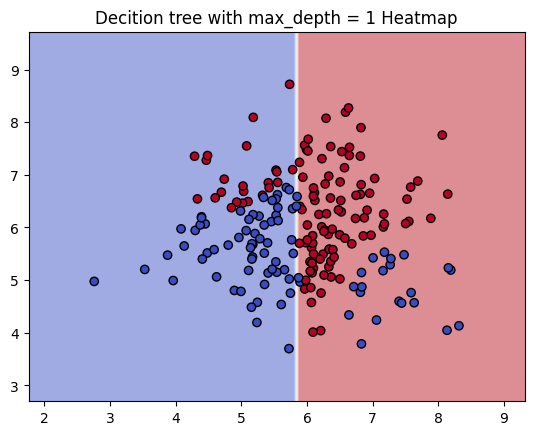

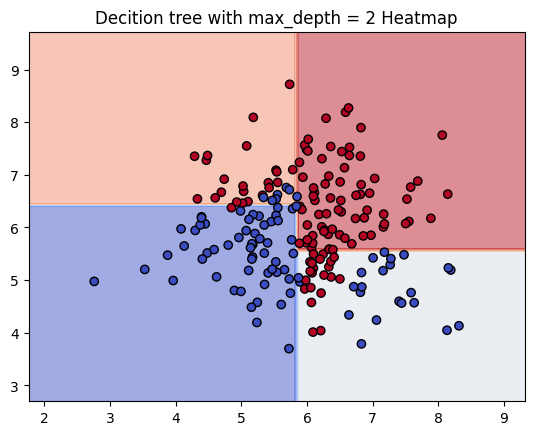

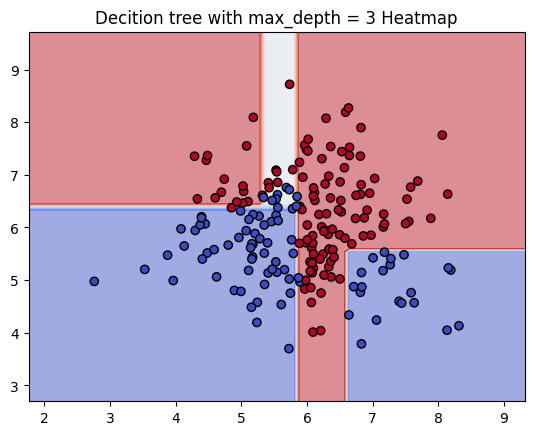

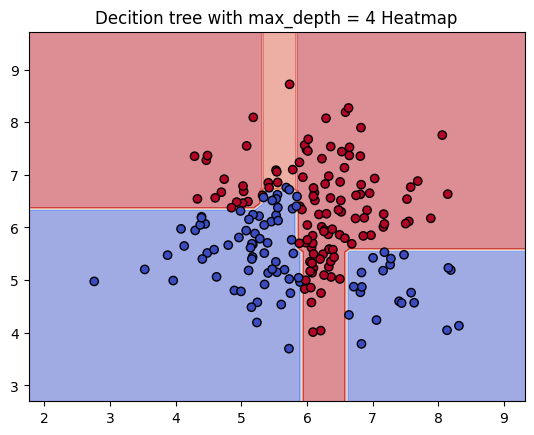

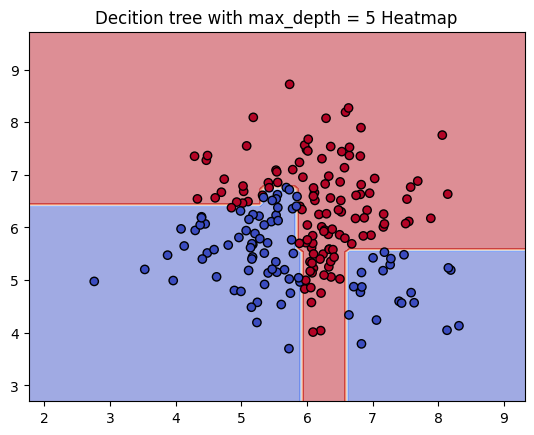

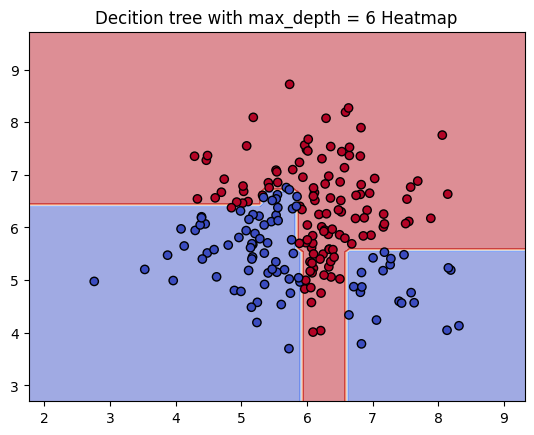

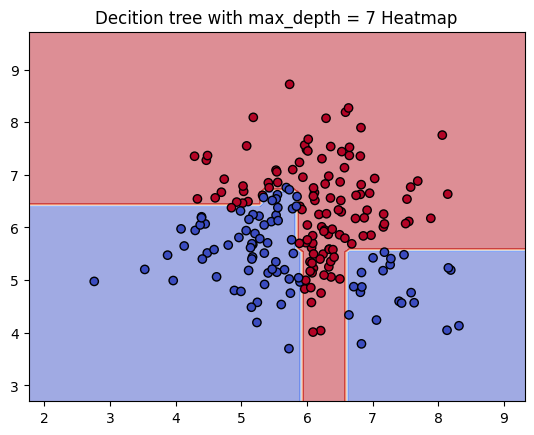

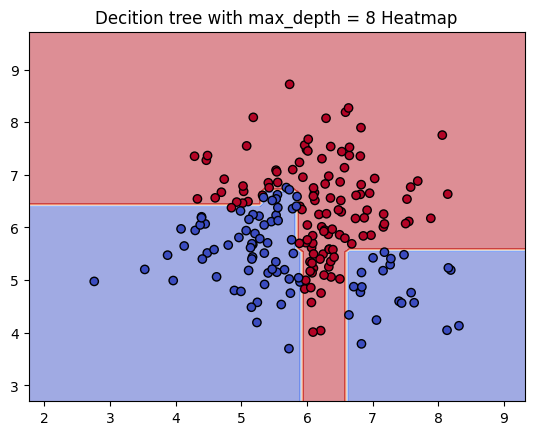

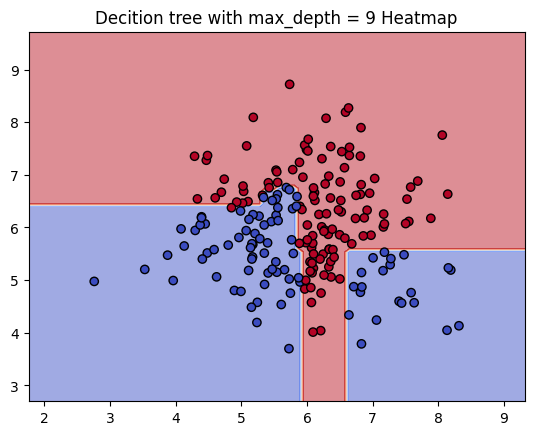

6


In [46]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in range(1, 10):
    clf = DecisionTreeClassifier(max_depth= depth)
    clf.fit(X_train, y_train)

    disp = DecisionBoundaryDisplay.from_estimator(
    clf, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)

    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.title(f"Decition tree with max_depth = {depth} Heatmap")
    plt.show()

print(clf.get_depth())




**Briefly explain what's happening**

In [33]:
#We can see that when maxdepth is superior or equal to 6 it is then the same result.
# It means that the tree doesn’t need to go any deeper than depth 6 to classify the training data.
#So when we increase max_depth beyond 6, the tree’s structure doesn’t change and the decision boundaries stay identical.


***Bonus question: what is the max depth that may be reached on this train set?***

This question may be slightly harder.

## SVM

**Can we obtain "probabilities" with SVM?**

In [34]:
#it seems that for the classification so SVC we can obtain probabilities as
#there is the function predict_proba which according to the documentation 
# "computes probabilities of possible outcomes for samples in X.
#The model needs to have probability information computed at training time: fit with attribute probability set to True."
#Indeed there is a parameter called probability.
#According to the documentation "probability is bool, default=False
#Whether to enable probability estimates. 
# This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict."

**Fit a <ins>single</ins> linear Support Vector Classifier on the training set, and display the heatmap**

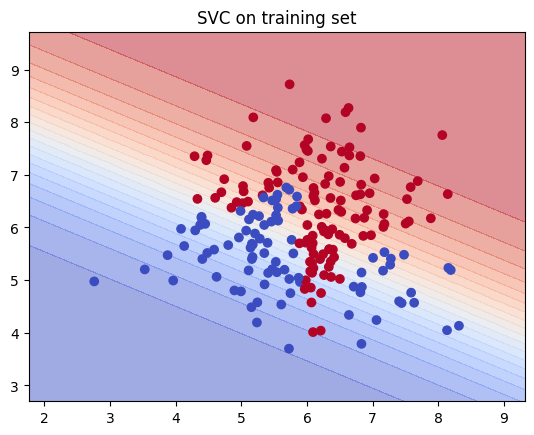

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
svm, X_train,
response_method="predict_proba",
cmap=plt.cm.coolwarm,
alpha=0.5,
levels=20
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("SVC on training set")
plt.show()



**Now, compute polynomial features of any degree, e.g. 3, and fit a <ins>linear</ins> SVC on these new features. Display the heatmap.**

Fitting the model may take some time.

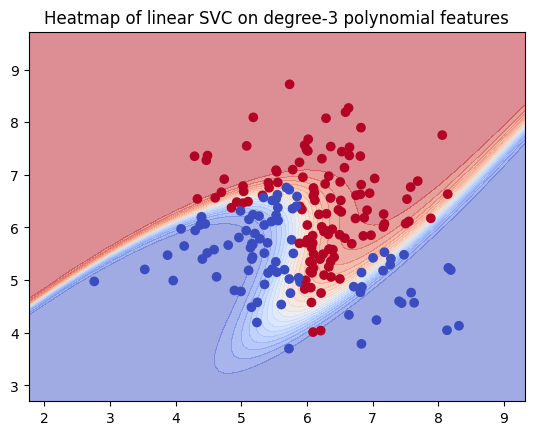

In [48]:
degree = 3
svm_poly = make_pipeline(
    PolynomialFeatures(degree),
    #StandardScaler(),              
    SVC(kernel='linear', probability=True) 
)
svm_poly.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    svm_poly,
    X_train,
    response_method="predict_proba", 
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)

disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title(f"Heatmap of linear SVC on degree-{degree} polynomial features")
plt.show()

**Fit a SVC on the initial 2D features, this time using a polynomial kernel of degree e.g. 3. Display the heatmap.**

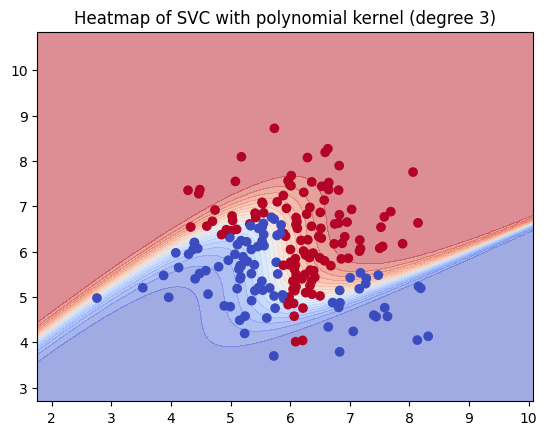

In [49]:
degree = 3
svm_poly_kernel = make_pipeline(
    #StandardScaler(),
    SVC(kernel='poly', degree=degree, probability=True)
)
svm_poly_kernel.fit(X_train, y_train)
disp = DecisionBoundaryDisplay.from_estimator(
    svm_poly_kernel,
    X,
    response_method="predict_proba",  
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)

disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)

plt.title(f"Heatmap of SVC with polynomial kernel (degree {degree})")
plt.show()

**Notice anything?**

In [39]:
#We notice that the boundaries between the two methods using two different kernel are pretty similar.
#However the one with a linear kernel seems to be a little bit more sensitive to the outliers. 

**Now fit SVCs with polynomial kernel of degree 1 to 5, and plot the heatmaps.**

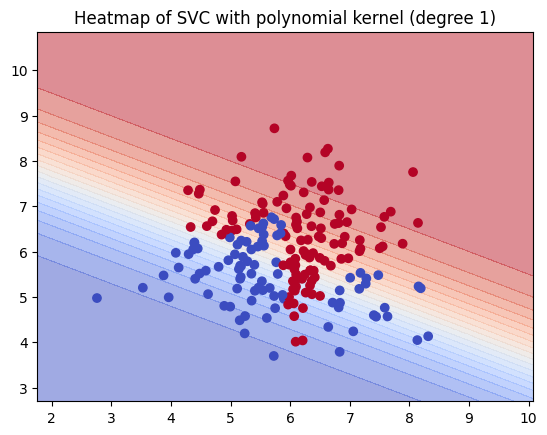

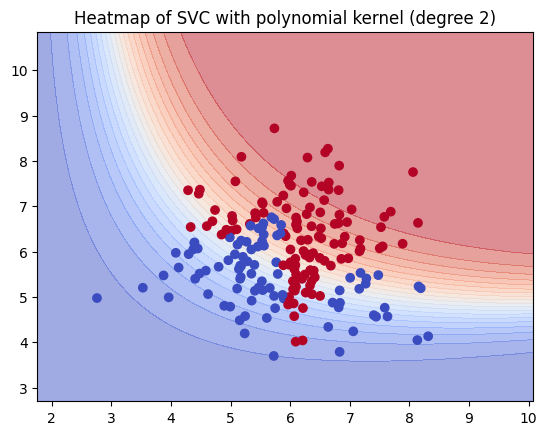

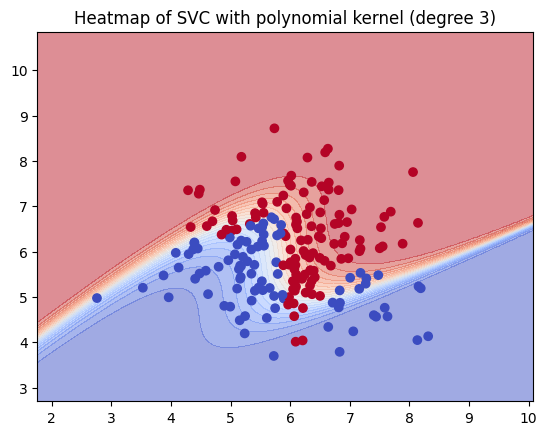

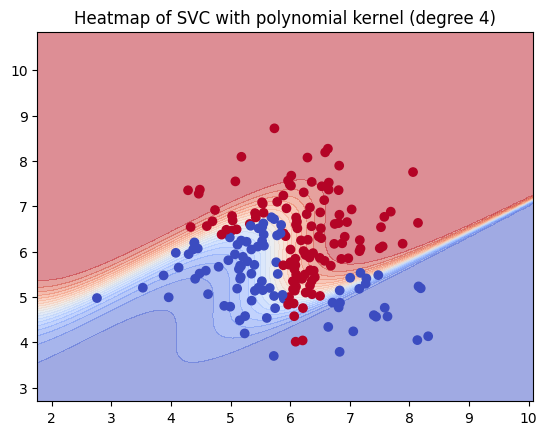

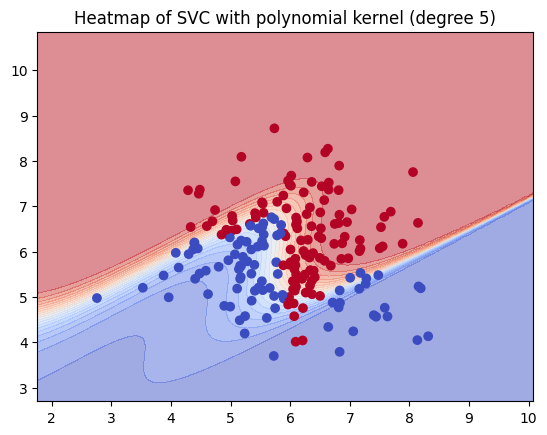

In [50]:
for degree in range (1,6):
    
    svm_poly_kernel = make_pipeline(
    #StandardScaler(),
    SVC(kernel='poly', degree=degree, probability=True)
    )
    svm_poly_kernel.fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        svm_poly_kernel,
        X,
        response_method="predict_proba",  
        cmap=plt.cm.coolwarm,
        alpha=0.5,
        levels=20
    )
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)

    plt.title(f"Heatmap of SVC with polynomial kernel (degree {degree})")
    plt.show()


**Briefly describe what is happening.**

In [38]:
#For degree 1 it is almost a straight line that is classifying.
#For degree 2 and 3 the decision boundaries are more curved and model 3 seems to be pretty ok but not perfect.
#Degree 4 and 5 give decision boundaries that seem to follow more closely the data points
#However there is a risk of overfitting

**Finally, use an RBF kernel. This time, use a good protocol to obtain reasonably good performance with RBF kernel.**

Best parameters: {'C': 1, 'gamma': 10}
Validation accuracy: 0.9387755102040817
Test accuracy: 0.96


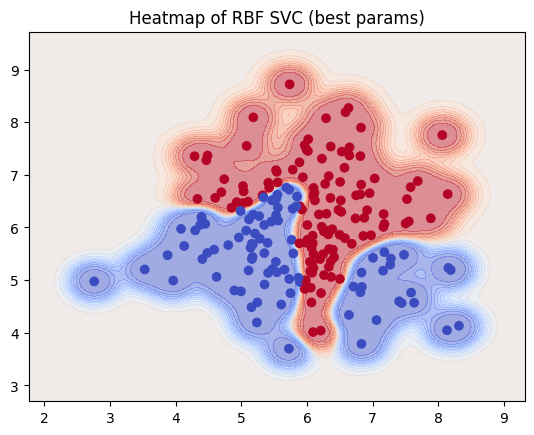

In [52]:
pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True))
])

hyperparameters = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.1, 1, 10, 'scale']
}

best_score = 0
best_params = {}
for C in hyperparameters['svc__C']:
    for gamma in hyperparameters['svc__gamma']:
        pipeline.set_params(svc__C=C, svc__gamma=gamma)
        pipeline.fit(X_train, y_train)
        val_score = pipeline.score(X_val, y_val) 
        if val_score > best_score:
            best_score = val_score
            best_params = {'C': C, 'gamma': gamma}

print("Best parameters:", best_params)
print("Validation accuracy:", best_score)

pipeline.set_params(svc__C=best_params['C'], svc__gamma=best_params['gamma'])
pipeline.fit(X_train, y_train)

test_score = pipeline.score(X_test, y_test)
print("Test accuracy:", test_score)

disp = DecisionBoundaryDisplay.from_estimator(
    pipeline,
    X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm,
    alpha=0.5,
    levels=20
)
       
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Heatmap of RBF SVC (best params)")
plt.show()